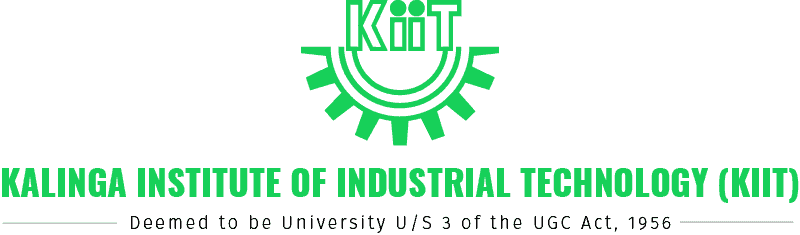

MUSIC RECOMMENDATION SYSTEM

Coded by: Rajarshi Dey (Roll No. 21051237) @KIIT & Niret Badgire (Roll No. 2105385) @KIIT
          
Coded in: jupyter notebook

Here we have created a music recommender system using collaborative filtering sytem by filtering out the result on the basis of users' ratings on a particular song. Our code consists of two datasets (a)User.data (consisting of the user id, song id, rating and timestamp) and (b)Song_Titles (consisting of the song id, respective song Title and the Year of release). 

We use these two datasets and by correlating the data we get our recommendation.

In [25]:
#importing required libraries
import numpy as np
import pandas as pd

In [26]:
#acquiring the user dataset
col_name = ['User_ID', 'Song_ID', 'Rating','Timestamps']
dfr = pd.read_csv('User.data', sep='\t', names=col_name)
dfr.head()

User_ID  Song_ID  Rating  Timestamps
0        0       50       5   881250949
1        0      172       5   881250949
2        0      133       1   881250949
3      196      242       3   881250949
4      186      302       3   891717742

In [27]:
#acquiring the song titles dataset
song_titles = pd.read_csv("Song_Titles")
song_titles.head()

Song_ID                    Title  Year
0        1     Like a Rolling Stone  1965
1        2  Smells Like Teen Spirit  1991
2        3        A Day in the Life  1967
3        4          Good Vibrations  1966
4        5          Johnny B. Goode  1958

In [28]:
#merging the datasets considering the key as Song_ID
dfr = pd.merge(dfr,song_titles,on='Song_ID')
dfr.head()

User_ID  Song_ID  Rating  Timestamps        Title  Year
0        0       50       5   881250949  Take Me Out  2004
1      290       50       5   880473582  Take Me Out  2004
2       79       50       4   891271545  Take Me Out  2004
3        2       50       5   888552084  Take Me Out  2004
4        8       50       5   879362124  Take Me Out  2004





Now, we perform Exploratory Data Analysis (EDA) to acquire some information from out datasets.

In [29]:
#importing required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [30]:
#acquiring the mean rating from the dataset w.r.t Title and Rating
dfr.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
The Funeral                5.0
Hey Ladies                 5.0
Arnold Layne               5.0
Mama Said Knock You Out    5.0
The Real Slim Shady        5.0
Name: Rating, dtype: float64

In the above code output we can get the output of many such songs having 5 rating but listened by the user only once or twice which would not be an optimal result for a recommendation system.



In [31]:
#creating a dataframe for the mean value
song_rating = pd.DataFrame(dfr.groupby('Title')['Rating'].mean())
song_rating.head()

Rating
Title                                    
'Round Midnight                  3.444444
(Don't Fear) The Reaper          3.171171
(Get Your Kicks On) Route 66     2.642857
(I Can't Get No) Satisfaction    3.831461
(I Don't Want to Go to) Chelsea  4.500000

Now we use the count function and group up the data w.r.t Title and Rating so as to get the maximum number of ratings of a song which would give up the information of how often a song is being listiened to by the users.

In [32]:
dfr.groupby('Title')['Rating'].count().sort_values(ascending=False).head()

Title
Take Me Out                     584
Rebellion (Lies)                509
Wonderwall                      508
Can't Get You Out of My Head    507
Theme from Shaft                485
Name: Rating, dtype: int64

In [33]:
#creating dataframe for the count value
song_rating['No. of Ratings'] = pd.DataFrame(dfr.groupby('Title')['Rating'].count())
song_rating.head()

Rating  No. of Ratings
Title                                                    
'Round Midnight                  3.444444              27
(Don't Fear) The Reaper          3.171171             111
(Get Your Kicks On) Route 66     2.642857              14
(I Can't Get No) Satisfaction    3.831461              89
(I Don't Want to Go to) Chelsea  4.500000               2




Now we perform some visualization analysis

<AxesSubplot:>

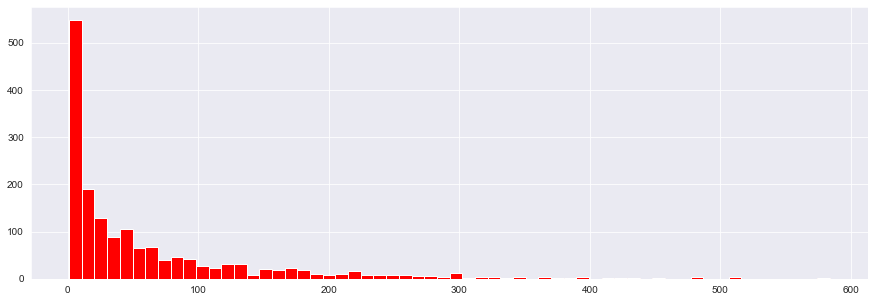

In [34]:
#creating histogram of how the no. of ratings is distributed
plt.figure(figsize=(15,5))
song_rating['No. of Ratings'].hist(bins=60,color='red')

<AxesSubplot:>

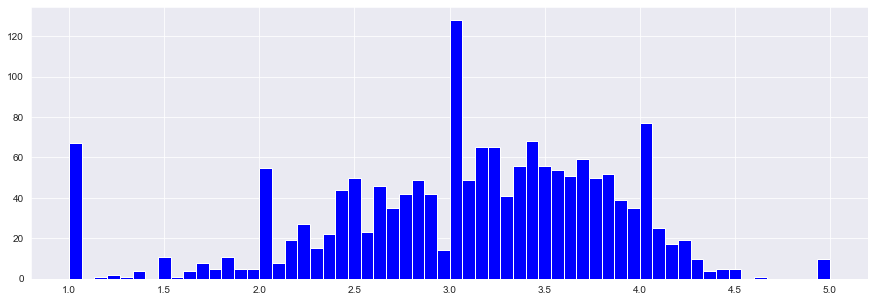

In [35]:
#creating histogram w.r.t Rating
plt.figure(figsize=(15,5))
song_rating['Rating'].hist(bins=60,color='blue')

In the above histogram we can find that the maximum users have provided the rating 3-4.
Here, we can also see that the graph is following a Gaussian distribution excluding some ratings like 1,2,5.





Now we create joint plot which would give us the information of both the scatter plot and the histogram.
Here, we get the information of what rating is being highly provided by the users and what rating is less.

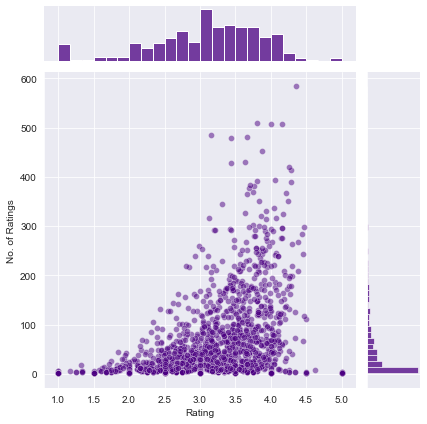

In [36]:
#creating jointplot having "Rating" on X-axis and "No. of Ratings" on Y-axis
sns.jointplot(x='Rating',y='No. of Ratings',data=song_rating,color='indigo',alpha=0.5,)

Now, after the data analysis we have some information and on the basis of that information we will create the recommendation system.

We now create a pivot table keeping index as "User_ID", columns as "Title" and values as "Rating".

In [37]:
#creating the pivot table
music_tab = dfr.pivot_table(index='User_ID',columns='Title',values='Rating')
music_tab.head()

Title    'Round Midnight  (Don't Fear) The Reaper  \
User_ID                                             
0                    NaN                      NaN   
1                    NaN                      1.0   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   

Title    (Get Your Kicks On) Route 66  (I Can't Get No) Satisfaction  \
User_ID                                                                
0                                 NaN                            NaN   
1                                 NaN                            3.0   
2                                 NaN                            2.0   
3                                 NaN                            NaN   
4                                 NaN                            NaN   

Title    (I Don't Want to Go to) Chelsea  (I'm) Stranded  \
User_ID                                                    
0                                    NaN             NaN   
1                                    NaN             NaN   
2                                    NaN             NaN   
3                                    NaN             NaN   
4                                    NaN             NaN   

Title    (No One Knows Me) Like the Piano  (Sittin' On) The Dock of the Bay  \
User_ID                                                                       
0                                     NaN                               NaN   
1                                     NaN                               3.0   
2                                     NaN                               NaN   
3                                     NaN                               NaN   
4                                     NaN                               NaN   

Title    (They Long to Be) Close to You  (We're Gonna) Rock Around the Clock  \
User_ID                                                                        
0                                   NaN                                  NaN   
1                                   NaN                                  5.0   
2                                   NaN                                  NaN   
3                                   NaN                                  NaN   
4                                   NaN                                  NaN   

Title    ...  Young Folks  Your Best American Girl  Your Cheatin' Heart  \
User_ID  ...                                                              
0        ...          NaN                      NaN                  NaN   
1        ...          NaN                      5.0                  NaN   
2        ...          NaN                      NaN                  NaN   
3        ...          2.0                      NaN                  NaN   
4        ...          NaN                      NaN                  NaN   

Title    Your Song  Your Woman  Zero  Ziggy Stardust  Zombie  \
User_ID                                                        
0              NaN         NaN   NaN             NaN     NaN   
1              NaN         NaN   NaN             3.0     NaN   
2              NaN         NaN   NaN             NaN     NaN   
3              NaN         NaN   NaN             NaN     NaN   
4              NaN         NaN   NaN             NaN     NaN   

Title    no tears left to cry  thank u, next  
User_ID                                       
0                         NaN            NaN  
1                         NaN            NaN  
2                         NaN            NaN  
3                         NaN            NaN  
4                         NaN            NaN  

[5 rows x 1657 columns]

From the above pivot table we find which user with respect to each song have given the ratings or not. Also this pivot table will help us get the recommendation based on which user have listened to a particular song and rated how much.




In [38]:
#sorting the NO. of Ratings
song_rating.sort_values('No. of Ratings',ascending=False).head(50)

Rating  No. of Ratings
Title                                                     
Take Me Out                       4.359589             584
Rebellion (Lies)                  3.803536             509
Wonderwall                        4.155512             508
Can't Get You Out of My Head      4.007890             507
Theme from Shaft                  3.156701             485
Israelites                        3.656965             481
Ring of Fire                      3.441423             478
Like a Rolling Stone              3.878319             452
Bye Bye Love                      3.631090             431
Papa's Got a Brand New Bag        3.438228             429
White Rabbit                      4.252381             420
A Whiter Shade of Pale            4.283293             413
Space Oddity                      4.060914             394
Be My Baby                        3.798469             392
That's All Right                  4.289744             390
The Girl from Ipanema             3.710938             384
Hound Dog                         3.761780             382
Rehab                             3.693122             378
Hurt                              3.747967             369
Nuthin' But a 'G' Thang           4.206522             368
Toxic                             3.660274             365
I Walk the Line                   3.834286             350
Bring the Noise                   4.245714             350
Blank Generation                  3.313953             344
California Dreamin'               4.044643             336
Subterranean Homesick Blues       3.930514             331
Hotline Bling                     3.631902             326
Peggy Sue                         4.172840             324
Alright                           3.853583             321
Purple Rain                       4.066456             316
Everything in Its Right Place     3.123418             316
Green Light                       3.926984             315
Das Modell/The Model              3.745875             303
Bizarre Love Triangle             3.833333             300
I Heard It Through the Grapevine  3.896321             299
Wake Up                           4.466443             298
Kick Out the Jams                 3.697987             298
Sympathy for the Devil            4.151515             297
Heartbeats                        4.161616             297
Life on Mars?                     4.006780             295
Just Like Heaven                  3.423729             295
Stairway to Heaven                3.443686             293
Rapper's Delight                  3.215017             293
Gloria                            3.197952             293
Love Will Tear Us Apart           3.778157             293
Your Best American Girl           4.034364             291
Go Your Own Way                   3.910345             290
Sunday Bloody Sunday              3.947183             284
Loser                             4.445230             283
Try a Little Tenderness           3.775000             280

Now as a user we take two songs like Take Me Out and A whiter Shade of Pale and based on the pivot table  we will try to recommend the best songs for the user to listen to using correlation.





In [39]:
#grabing the information of the songs Take Me Out and A whiter Shade of Pale from the pivot table
Take_Me_Out_UR = music_tab['Take Me Out']
A_Whiter_Shade_of_Pale_UR = music_tab['A Whiter Shade of Pale']

In [40]:
#displaying the information grabbed for the song Take Me Out
Take_Me_Out_UR.head(10)

User_ID
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Take Me Out, dtype: float64

In [41]:
#displaying the information grabbed for the song A whiter Shade of Pale
A_Whiter_Shade_of_Pale_UR.head(10)

User_ID
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
5    NaN
6    5.0
7    5.0
8    5.0
9    NaN
Name: A Whiter Shade of Pale, dtype: float64

From the above two information sets we can see which user have listened to the songs Take Me Out and A Whiter Shade of Pale and what ratings they have provided respectively.






In [42]:
#correlating the info of the songs Take Me Out and A Whiter Shade of Pale with the pivot table "music_tab"
similar_to_Take_Me_Out = music_tab.corrwith(Take_Me_Out_UR)
similar_to_A_Whiter_Shade_of_Pale = music_tab.corrwith(A_Whiter_Shade_of_Pale_UR)

C:\Users\KIIT\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [43]:
#creating the dataframe for the correlated data and also droping out the nan values
co_rltn_Take_Me_Out = pd.DataFrame(similar_to_Take_Me_Out,columns=['Correlation'])
co_rltn_Take_Me_Out.dropna(inplace=True)
co_rltn_Take_Me_Out.head(10)

Correlation
Title                                                           
'Round Midnight                                    -1.576676e-17
(Don't Fear) The Reaper                             2.042772e-01
(Get Your Kicks On) Route 66                        2.067246e-01
(I Can't Get No) Satisfaction                      -3.532059e-02
(I'm) Stranded                                     -1.000000e+00
(Sittin' On) The Dock of the Bay                    9.035110e-02
(We're Gonna) Rock Around the Clock                -1.606907e-01
(What's So Funny 'Bout) Peace Love & Understanding -1.740777e-01
(White Man) In Hammersmith Palais                   1.371029e-03
(You Gotta) Fight for Your Right (To Party!)        9.451427e-02






Now if we sort the dataframe by correlation, we should get the most similar songs, however note that we might get some unwanted results. This is because there are a lot of songs only listened once by users who also listened the song Take Me Out(It has highest number of rating i.e. it is a popular song).

In [44]:
co_rltn_Take_Me_Out.sort_values('Correlation',ascending=False).head(10)

Correlation
Title                         
Let's Go Crazy             1.0
Atlantic City              1.0
Sabali                     1.0
Take Me Out                1.0
Susie-Q                    1.0
Smack My Bitch Up          1.0
Chelsea Hotel #2           1.0
Tears in Heaven            1.0
The Chain                  1.0
Both Sides, Now            1.0

To prevent the unwanted result we filter out songs that have less than 100 ratings (this value was chosen based off the histogram from earlier).

In [45]:
#joining No. of Ratings to the correlation data of Take Me Out
co_rltn_Take_Me_Out = co_rltn_Take_Me_Out.join(song_rating['No. of Ratings'])
co_rltn_Take_Me_Out.head()

Correlation  No. of Ratings
Title                                                      
'Round Midnight               -1.576676e-17              27
(Don't Fear) The Reaper        2.042772e-01             111
(Get Your Kicks On) Route 66   2.067246e-01              14
(I Can't Get No) Satisfaction -3.532059e-02              89
(I'm) Stranded                -1.000000e+00               4

In [46]:
#filtering songs less than 100 number of ratings
co_rltn_Take_Me_Out[co_rltn_Take_Me_Out['No. of Ratings']>100].sort_values('Correlation',ascending=False).head()

Correlation  No. of Ratings
Title                                                     
Take Me Out                       1.000000             584
Nuthin' But a 'G' Thang           0.748353             368
Can't Get You Out of My Head      0.672556             507
White Rabbit                      0.536117             420
The Times They Are A-Changin'     0.377433             130

Thus we come to our final output which provides us with the recommended songs to be listened by a user who has listened to the song "Take Me Out"

Now we do the same thing for the song A Whiter Shade of Pale

In [47]:
co_rltn_A_Whiter_Shade_of_Pale = pd.DataFrame(similar_to_A_Whiter_Shade_of_Pale,columns=['Correlation'])
co_rltn_A_Whiter_Shade_of_Pale.dropna(inplace=True)
co_rltn_A_Whiter_Shade_of_Pale = co_rltn_A_Whiter_Shade_of_Pale.join(song_rating['No. of Ratings'])
co_rltn_A_Whiter_Shade_of_Pale[co_rltn_A_Whiter_Shade_of_Pale['No. of Ratings']>100].sort_values('Correlation',ascending=False).head()

Correlation  No. of Ratings
Title                                                           
A Whiter Shade of Pale                  1.000000             413
Get It On [Bang a Gong (Get It On)]     0.683862             209
Honky Tonk Women                        0.421477             226
Rock the Casbah                         0.393439             215
Visions of Johanna                      0.386226             122

Thus we come to our final output which provides us with the recommended songs to be listened by a user who has listened to the song "A Whiter Shade of Pale"

Done!!